In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [102]:
df = pd.read_csv('flow.csv', parse_dates= True)
df

C:\Users\HF\AppData\Local\Temp\ipykernel_21896\3436115571.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow.csv', parse_dates= True)


,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.711896e+09,4,10.0.0.3,NaN,10.0.0.8,NaN,0,NaN,6.0,39718.0,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,120,60,0,NaN
1,1.711896e+09,4,10.0.0.8,NaN,10.0.0.3,NaN,0,NaN,6.0,5005.0,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,120,60,0,NaN
2,1.711896e+09,4,10.0.0.3,NaN,10.0.0.8,NaN,0,NaN,6.0,39718.0,...,38790,0.000000,0.000000e+00,1742707740,0.000000,0.000000e+00,120,60,0,NaN
3,1.711896e+09,4,10.0.0.3,NaN,10.0.0.8,NaN,0,NaN,6.0,39718.0,...,785,0.000000,0.000000e+00,1187042,0.000000,0.000000e+00,120,60,0,NaN
4,1.711896e+09,4,10.0.0.8,NaN,10.0.0.3,NaN,0,NaN,6.0,5005.0,...,29240,0.000000,0.000000e+00,1929852,0.000000,0.000000e+00,120,60,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600090,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,120,60,1,slowloris
1600091,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,120,60,1,slowloris
1600092,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,120,60,1,slowloris
1600093,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,120,60,1,slowloris


In [41]:
df['Attack_type'].value_counts()

Attack_type
icmp flood    322680
slowloris     321843
http flood    318507
udp flood     310649
SYN flood     310612
Name: count, dtype: int64

In [103]:
df = df.drop(columns=['Timestamp', 'Datapath_id', 'Ip_src', 'Mac_src', 'Mac_dst',
                        'Arp_code', 'Ip_protocole', 'Port_src','Tcp_flags', 'Hard_timeout', 'Idle_timeout'])
df

,Ip_dst,Arp,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,NS,WCR,ECE,...,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type
0,10.0.0.8,0,5005.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,0,599000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,NaN
1,10.0.0.3,0,39718.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,0,596000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,NaN
2,10.0.0.8,0,5005.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,0,563000000,38790,0.000000,0.000000e+00,1742707740,0.000000,0.000000e+00,0,NaN
3,10.0.0.8,0,5005.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,0,561000000,785,0.000000,0.000000e+00,1187042,0.000000,0.000000e+00,0,NaN
4,10.0.0.3,0,39718.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,0,542000000,29240,0.000000,0.000000e+00,1929852,0.000000,0.000000e+00,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600090,10.0.0.8,0,60444.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1,slowloris
1600091,10.0.0.8,0,60460.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1,slowloris
1600092,10.0.0.8,0,60444.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1,slowloris
1600093,10.0.0.8,0,60444.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,...,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1,slowloris


In [94]:
df.fillna(0, inplace=True)
df.isna().value_counts()

Ip_dst  Arp    Port_dst  Icmp   Icmp_code  Icmp_type  Tcp    NS     WCR    ECE    URG    ACK    PSH    RST    SYN    FIN    Http   SSL    SSH    Ftp    Udp    Dns    Dhcp   Flow_duration  Flow_dur_nsec  Packet_count  Pkt_per_sec  Pkt_per_nsec  Bytes  Bytes_per_sec  Bytes_per_nsec  Attack  Attack_type
False   False  False     False  False      False      False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False          False          False         False        False         False  False          False           False   False          1600095
Name: count, dtype: int64

In [104]:
df['Attack_type'].replace({'udp flood':1, 'icmp flood':2,'SYN flood':3,'http flood':4,'slowloris':5}, inplace= True)
df['Attack_type'].value_counts()

C:\Users\HF\AppData\Local\Temp\ipykernel_21896\4249898016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attack_type'].replace({'udp flood':1, 'icmp flood':2,'SYN flood':3,'http flood':4,'slowloris':5}, inplace= True)
C:\Users\HF\AppData\Local\Temp\ipykernel_21896\4249898016.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fut

Attack_type
2.0    322680
5.0    321843
4.0    318507
1.0    310649
3.0    310612
Name: count, dtype: int64

In [105]:
df.describe()

,Arp,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,NS,WCR,ECE,URG,...,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type
count,1.600095e+06,1.275771e+06,1.599181e+06,323410.000000,323410.000000,1.599181e+06,965537.0,965537.0,965537.0,965537.0,...,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.584291e+06
mean,5.712161e-04,1.090788e+04,2.022348e-01,0.003952,7.988665,6.037697e-01,0.0,0.0,0.0,0.0,...,2.402611e+01,4.986113e+08,2.707781e+01,1.946154e+00,6.231103e-08,6.955488e+05,5.005151e+04,1.463844e-03,9.901231e-01,3.011497e+00
std,2.389331e-02,2.061970e+04,4.016665e-01,0.108809,0.266077,4.891135e-01,0.0,0.0,0.0,0.0,...,1.805770e+01,2.872234e+08,1.819203e+03,2.377103e+02,4.448022e-06,6.753337e+07,8.865342e+06,1.532510e-01,9.889068e-02,1.414741e+00
min,0.000000e+00,2.100000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.300000e+01,0.000000e+00,0.000000,8.000000,0.000000e+00,0.0,0.0,0.0,0.0,...,8.000000e+00,2.510000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
50%,0.000000e+00,8.000000e+01,0.000000e+00,0.000000,8.000000,1.000000e+00,0.0,0.0,0.0,0.0,...,2.100000e+01,4.980000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
75%,0.000000e+00,8.000000e+01,0.000000e+00,0.000000,8.000000,1.000000e+00,0.0,0.0,0.0,0.0,...,3.900000e+01,7.460000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
max,1.000000e+00,6.099800e+04,1.000000e+00,3.000000,8.000000,1.000000e+00,0.0,0.0,0.0,0.0,...,9.400000e+01,9.990000e+08,2.855880e+05,9.519600e+04,8.005171e-04,1.309046e+10,4.363486e+09,2.591229e+01,1.000000e+00,5.000000e+00


In [106]:
df.describe()

,Arp,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,NS,WCR,ECE,URG,...,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type
count,1.600095e+06,1.275771e+06,1.599181e+06,323410.000000,323410.000000,1.599181e+06,965537.0,965537.0,965537.0,965537.0,...,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.600095e+06,1.584291e+06
mean,5.712161e-04,1.090788e+04,2.022348e-01,0.003952,7.988665,6.037697e-01,0.0,0.0,0.0,0.0,...,2.402611e+01,4.986113e+08,2.707781e+01,1.946154e+00,6.231103e-08,6.955488e+05,5.005151e+04,1.463844e-03,9.901231e-01,3.011497e+00
std,2.389331e-02,2.061970e+04,4.016665e-01,0.108809,0.266077,4.891135e-01,0.0,0.0,0.0,0.0,...,1.805770e+01,2.872234e+08,1.819203e+03,2.377103e+02,4.448022e-06,6.753337e+07,8.865342e+06,1.532510e-01,9.889068e-02,1.414741e+00
min,0.000000e+00,2.100000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.300000e+01,0.000000e+00,0.000000,8.000000,0.000000e+00,0.0,0.0,0.0,0.0,...,8.000000e+00,2.510000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
50%,0.000000e+00,8.000000e+01,0.000000e+00,0.000000,8.000000,1.000000e+00,0.0,0.0,0.0,0.0,...,2.100000e+01,4.980000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
75%,0.000000e+00,8.000000e+01,0.000000e+00,0.000000,8.000000,1.000000e+00,0.0,0.0,0.0,0.0,...,3.900000e+01,7.460000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
max,1.000000e+00,6.099800e+04,1.000000e+00,3.000000,8.000000,1.000000e+00,0.0,0.0,0.0,0.0,...,9.400000e+01,9.990000e+08,2.855880e+05,9.519600e+04,8.005171e-04,1.309046e+10,4.363486e+09,2.591229e+01,1.000000e+00,5.000000e+00


<Axes: >

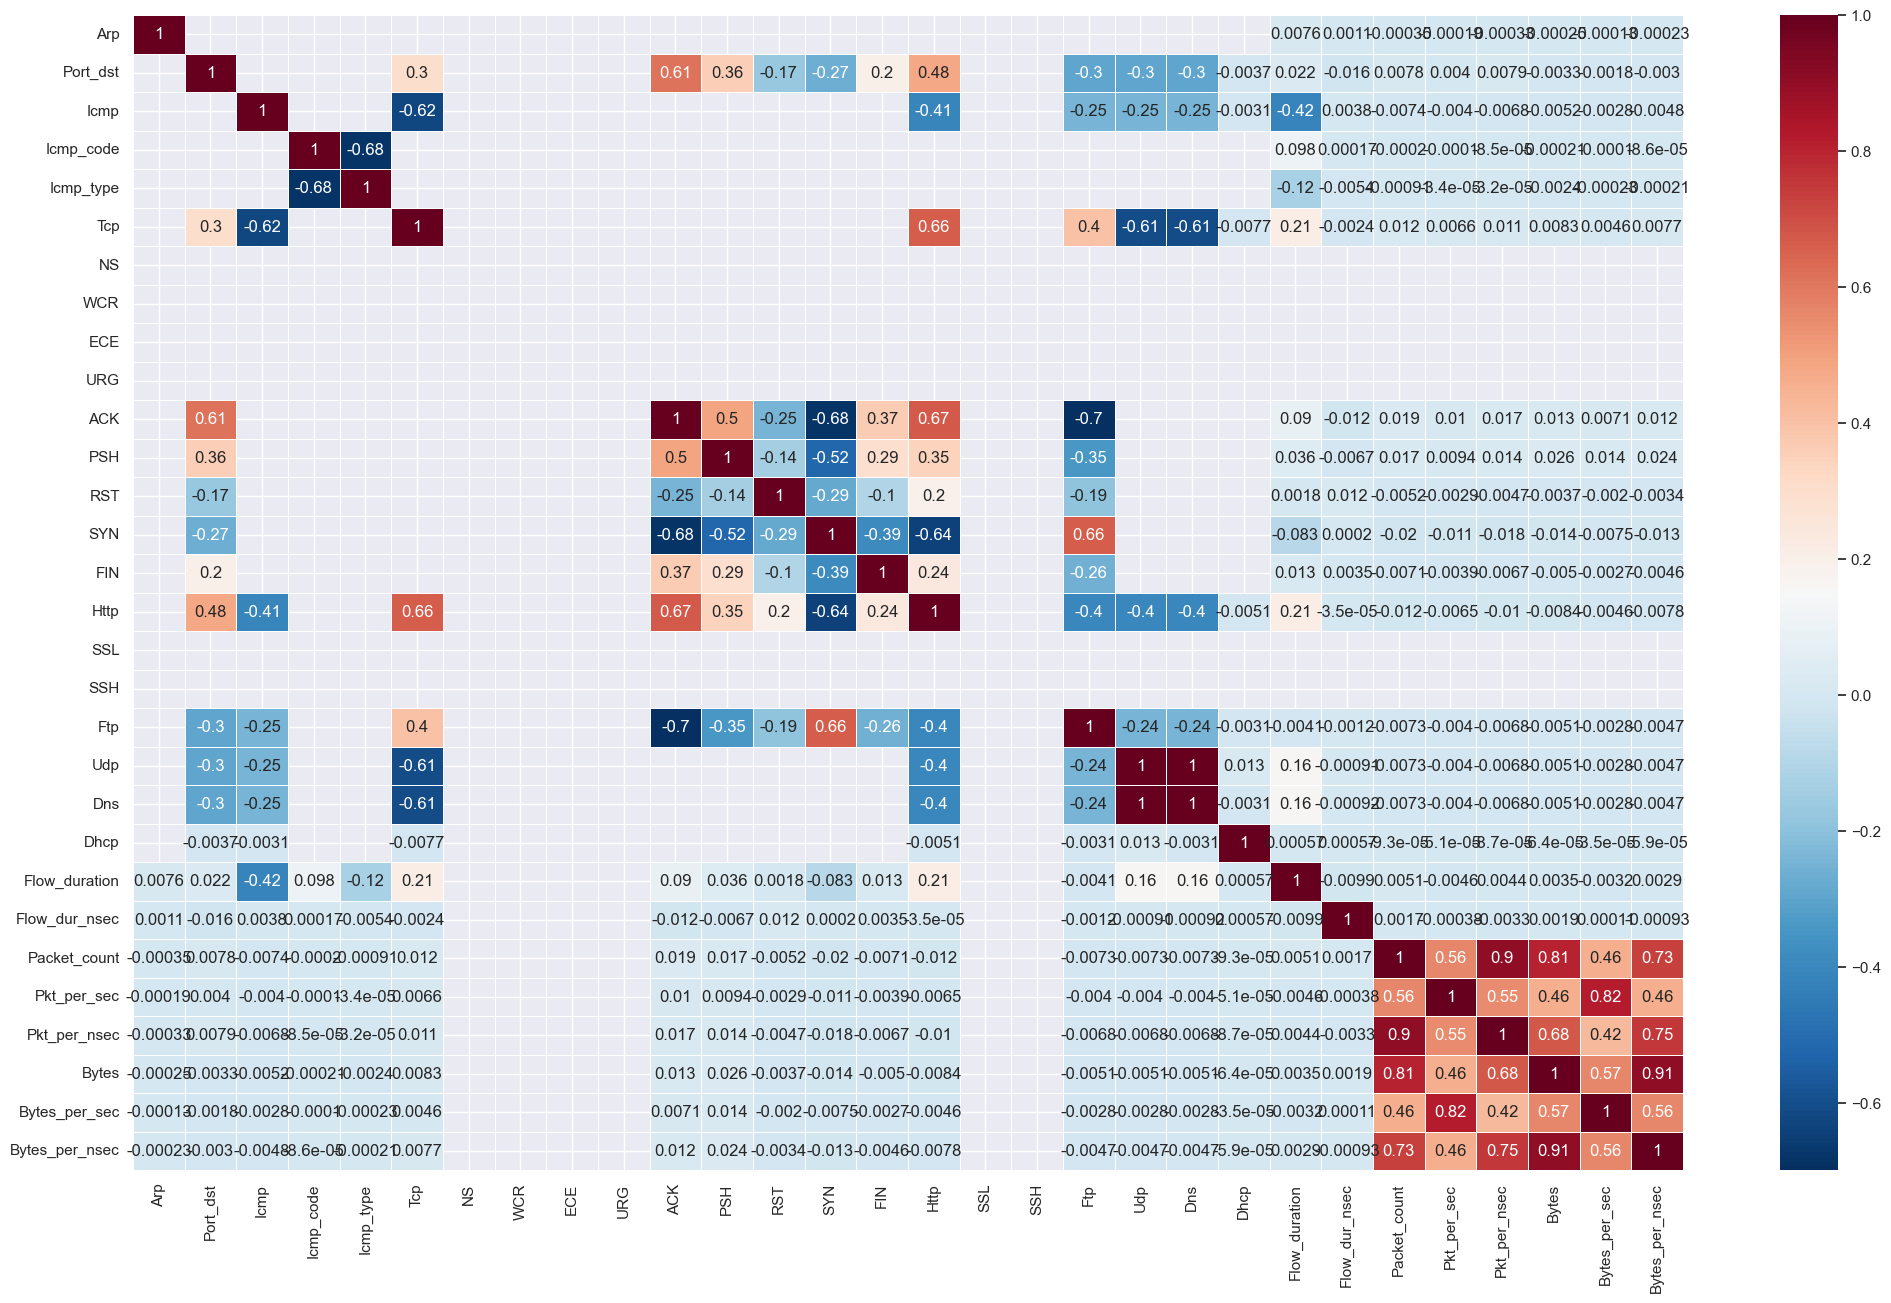

In [107]:
matrix_corr_pearson = df.drop(columns=['Ip_dst','Attack', 'Attack_type'], axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(matrix_corr_pearson, 
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [108]:
columnsdrop=['Bytes_per_nsec','Pkt_per_nsec','Dns','Icmp_type']
df=df.drop(columns=columnsdrop,axis=1)
df

,Ip_dst,Arp,Port_dst,Icmp,Icmp_code,Tcp,NS,WCR,ECE,URG,...,Udp,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack,Attack_type
0,10.0.0.8,0,5005.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,599000000,0,0.000000,0,0.000000,0,NaN
1,10.0.0.3,0,39718.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,596000000,0,0.000000,0,0.000000,0,NaN
2,10.0.0.8,0,5005.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,563000000,38790,0.000000,1742707740,0.000000,0,NaN
3,10.0.0.8,0,5005.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,561000000,785,0.000000,1187042,0.000000,0,NaN
4,10.0.0.3,0,39718.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,542000000,29240,0.000000,1929852,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600090,10.0.0.8,0,60444.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,74,824000000,8,0.108108,3436,46.432432,1,5.0
1600091,10.0.0.8,0,60460.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,74,811000000,7,0.094595,1922,25.972973,1,5.0
1600092,10.0.0.8,0,60444.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,74,811000000,2,0.027027,444,6.000000,1,5.0
1600093,10.0.0.8,0,60444.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,74,810000000,1,0.013514,1351,18.256757,1,5.0


<Axes: >

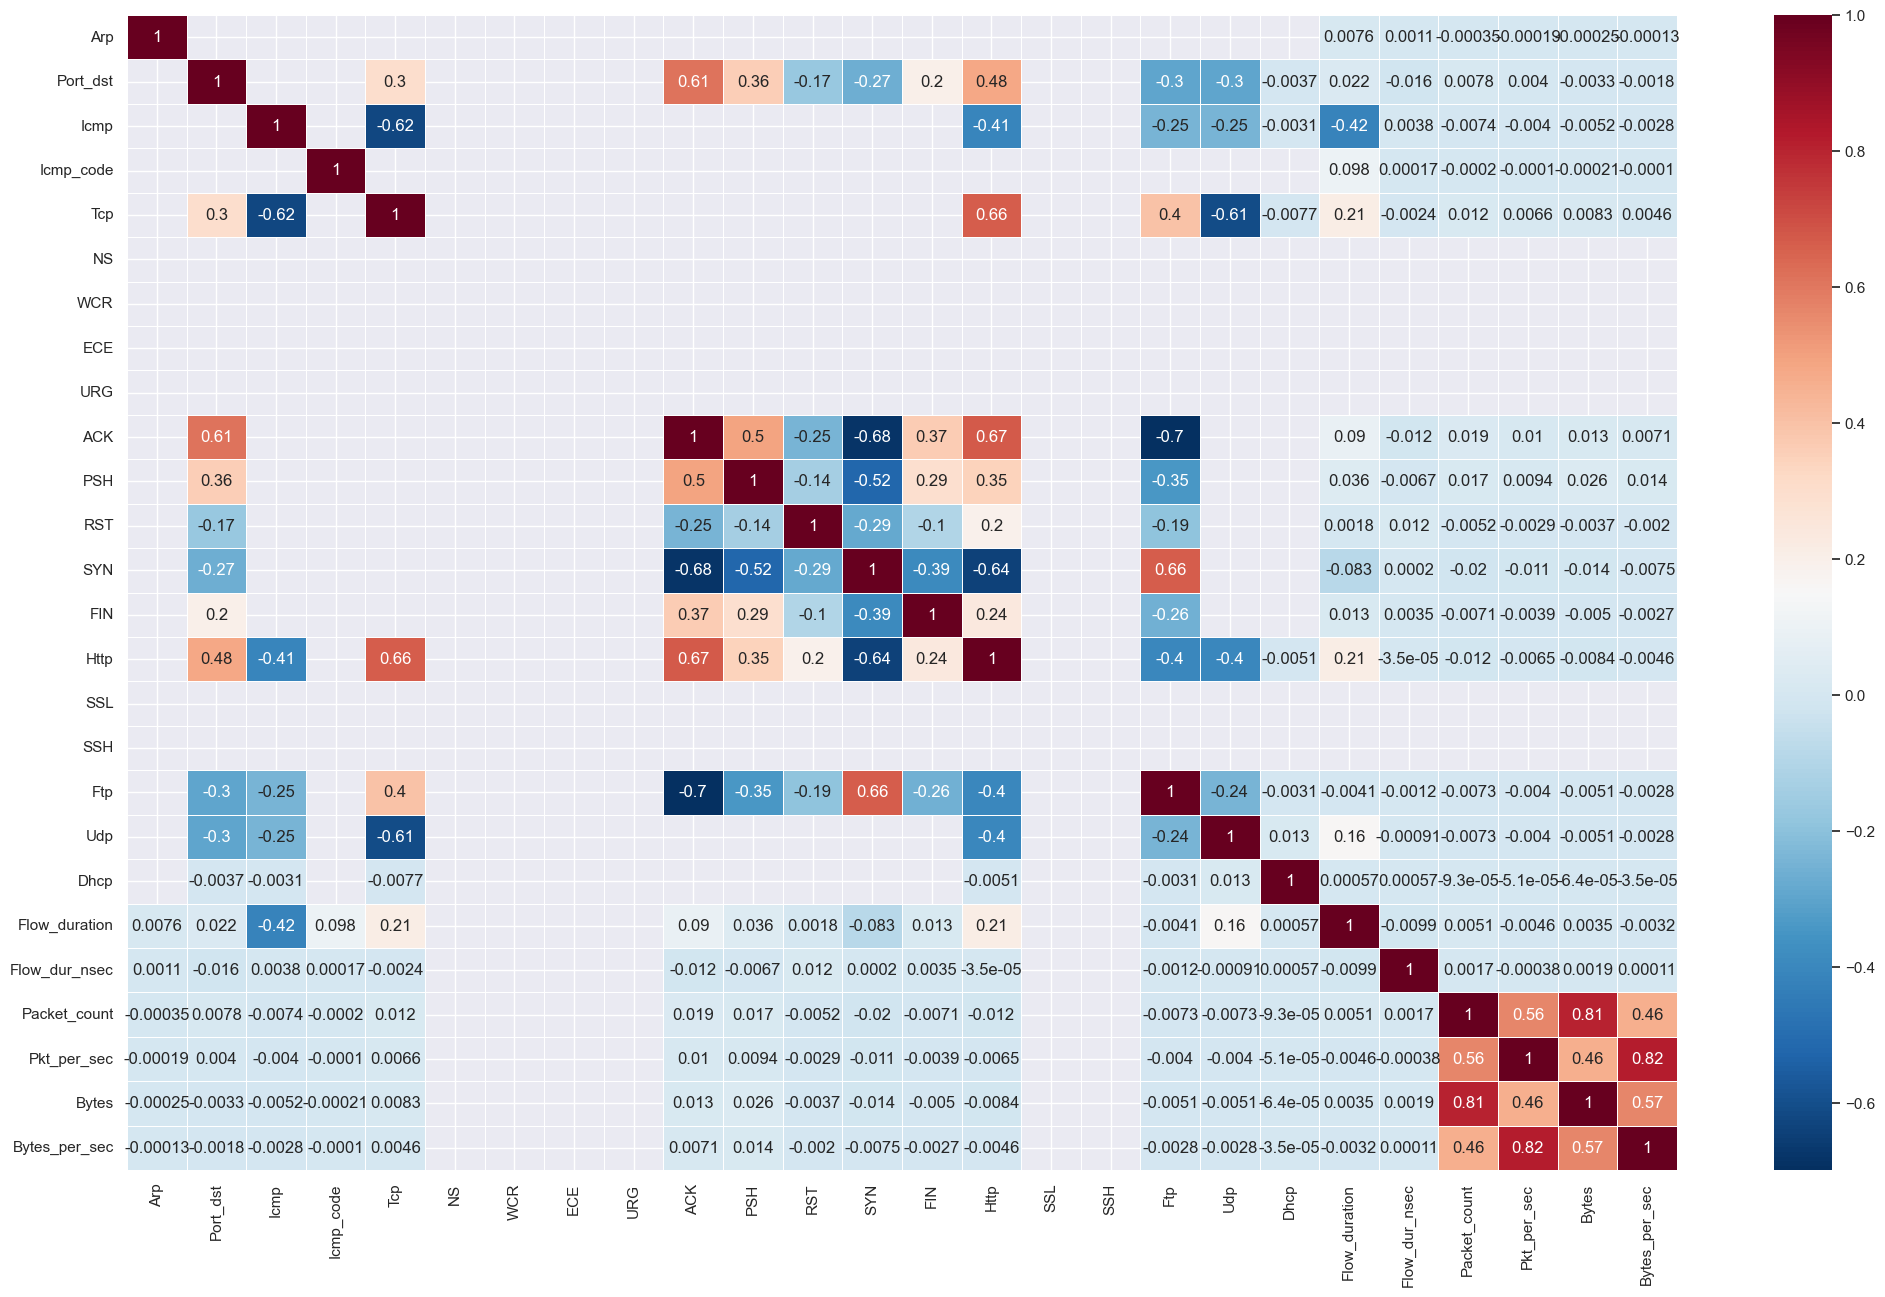

In [109]:
matrix_corr_pearson = df.drop(columns=['Ip_dst','Attack', 'Attack_type'], axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(matrix_corr_pearson, 
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)